# **PowerLift Muscle Map**

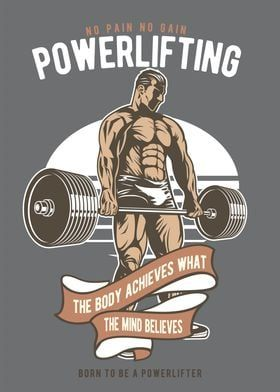

## **Dataset Description**
Dataset taken from kaggle- [https://www.kaggle.com/datasets/kukuroo3/powerlifting-benchpress-weight-predict/data](https://)

This dataset contains information about individuals participating in strength training, specifically focusing on powerlifting. The dataset includes the following features:

1. **playerId** : A unique identifier for each player

2. **Name**:  The name of the player.

3. **Sex**: The gender of the player 'Male' or 'Female'.

4. **Equipment**: The type of lifting equipment used, which can be one of the following:

    1. **Raw** :
        * *What It Is*: Lifting without any extra equipment.
        * *What It Means*: You’re lifting with just your regular workout clothes. It’s all about your own strength and technique without any help from gear.
    2. **Wraps** :
        * *What It Is*: Using supportive wraps for your knees or wrists.
        * *What It Means*: These are like extra bands or straps that help support your knees (for squats) or wrists (for lifting). They make lifting a bit easier and help prevent injuries.
    3. **Single-ply**
        * *What It Is*: Wearing special lifting gear made from one layer of fabric.
        * *What It Means*: This gear, like a lifting suit or shirt, gives some extra support and helps you lift more weight than without it. It’s not too bulky, but it does give a bit more help.
    4. **Multiple-ply**
        * *What It Is*: Using lifting gear made from several layers of fabric.
        * *What It Means*: This gear is made from multiple layers, making it very supportive and strong. It helps you lift even heavier weights because it provides a lot of extra support and stability.


5. **Age**: The age of the player

6. **BodyweightKg**: The body weight of the player in kilograms.
BestSquatKg: The maximum weight the player can squat, measured in kilograms.
7. **BestDeadliftKg**: The maximum weight the player can deadlift, measured in kilograms. This is the target variable for prediction.
8. **Bestbench(kg)**: The maximum weight the player can bench press, measured in kilograms.

 **Aim:**

 <code>The goal of the PowerLift Muscle Map project is to build and evaluate predictive models to estimate the best deadlift weight based on the available features. We will explore different models, analyze feature importance, and visualize the impact of various factors on lifting performance.</code>

 It is a great project also help individual in gym to predicted their Maximum kg Deadlift based on some information give motivation to them to achieve their predicted goal.

 **!!Caution**:
    - For Beginner :
      - When starting with deadlift training, it's important to begin with half of your predicted maximum weight. Gradually increase the weight in small steps, focusing on improving your form and boosting your confidence with each lift. This approach helps you build strength safely and effectively.



            *Precaution is better than injury.*
               Rule for Gym || Rule for Life
                ....Time to Level up guys....
                    (2 AM thoughts-PDS)
  










### Importing useful libraries


In [1]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#imoprting sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder




In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Creating dataframe by reading dataset

In [5]:
#read datasets
df=pd.read_csv('gym_powerlifting_correct.csv')


In [6]:
df.head()

,playerId,Name,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg,Bestbench(kg)
0,0,Russell Williams,M,Raw,76.0,83.35,107.5,132.5,62.5
1,1,Daniel Johnson,M,Raw,25.0,88.81,215.0,255.0,137.5
2,2,Joshua Chambers,M,Raw,20.5,117.95,207.5,210.0,110.0
3,3,Darren Sun,M,Raw,21.0,73.98,192.5,222.5,115.0
4,4,Madelyn Day,F,Raw,17.5,46.00,62.5,105.0,42.5


In [7]:
df.shape

(29580, 9)

In [8]:
df.nunique()

playerId          29580
Name              23041
Sex                   2
Equipment             4
Age                 151
BodyweightKg       4776
BestSquatKg         684
BestDeadliftKg      564
Bestbench(kg)       578
dtype: int64

In [9]:
df.isnull().sum()

playerId          0
Name              0
Sex               0
Equipment         0
Age               0
BodyweightKg      0
BestSquatKg       0
BestDeadliftKg    0
Bestbench(kg)     0
dtype: int64

### Droping unwanted feature

In [10]:
drop_features=['playerId','Name',]
df1=df.drop(drop_features,axis=1)


In [11]:
df1.head()



,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg,Bestbench(kg)
0,M,Raw,76.0,83.35,107.5,132.5,62.5
1,M,Raw,25.0,88.81,215.0,255.0,137.5
2,M,Raw,20.5,117.95,207.5,210.0,110.0
3,M,Raw,21.0,73.98,192.5,222.5,115.0
4,F,Raw,17.5,46.00,62.5,105.0,42.5


In [12]:
df1.isnull().sum()

Sex               0
Equipment         0
Age               0
BodyweightKg      0
BestSquatKg       0
BestDeadliftKg    0
Bestbench(kg)     0
dtype: int64

In [13]:
df1.shape

(29580, 7)

### Taking insights from datasets

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             29580 non-null  object 
 1   Equipment       29580 non-null  object 
 2   Age             29580 non-null  float64
 3   BodyweightKg    29580 non-null  float64
 4   BestSquatKg     29580 non-null  float64
 5   BestDeadliftKg  29580 non-null  float64
 6   Bestbench(kg)   29580 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [15]:
df1.describe()

,Age,BodyweightKg,BestSquatKg,BestDeadliftKg,Bestbench(kg)
count,29580.000000,29580.000000,29580.000000,29580.000000,29580.000000
mean,29.678786,85.346240,178.229907,201.086612,116.456714
std,11.576102,22.881544,71.793053,62.412353,52.365008
min,7.000000,24.100000,-330.000000,18.100000,-280.000000
25%,21.500000,68.000000,122.500000,147.500000,72.500000
50%,26.500000,82.095000,175.000000,204.120000,115.000000
75%,35.000000,98.880000,222.500000,247.500000,150.000000
max,89.500000,242.400000,532.970000,420.500000,425.000000


## **Exploratory Data Analysis (EDA)**

### Getting insight about data

Countplot

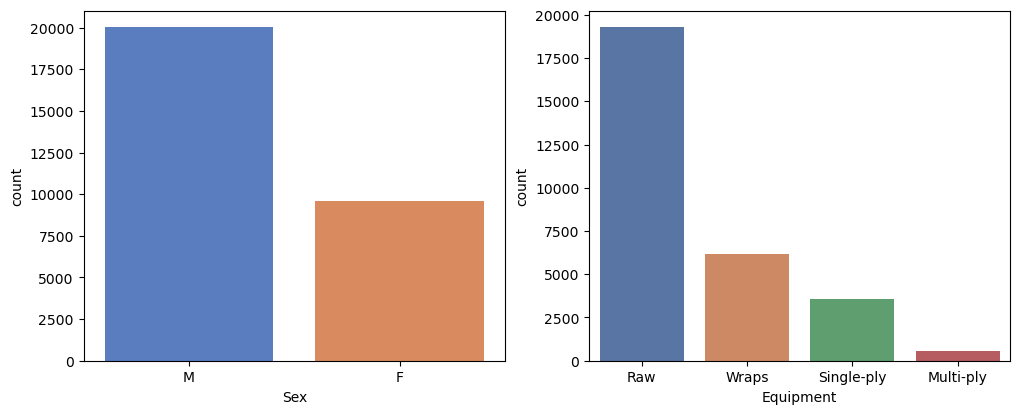

In [16]:
# countplot
plt.figure(figsize=(25,10))
plt.subplot(2,4,1)
sns.countplot(x='Sex',data=df1,palette='muted')
plt.subplot(2,4,2)
sns.countplot(x='Equipment',data=df1,palette='deep')
plt.show()



Scatter Plot with Regression Line
- A scatter plot with a regression line helps to visualize the relationship
  between two numerical variables along with the trend.

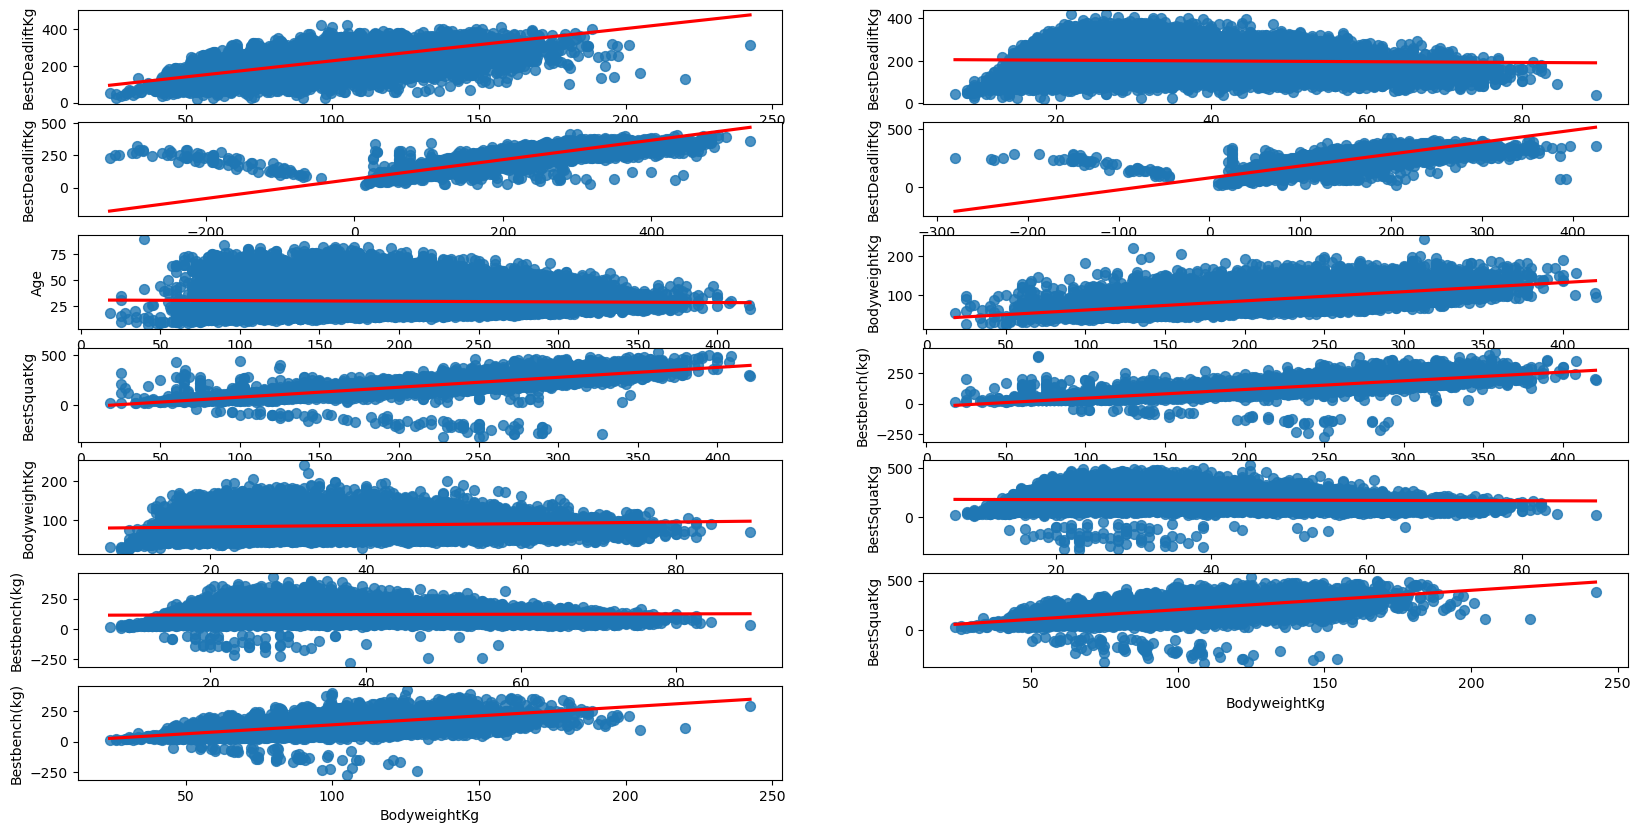

In [17]:
# Scatter Plot with Regression Line
# plt.figure(figsize=(30, 10))
plt.figure(figsize=(20,10))
plt.subplot(7,2,1)
sns.regplot(x='BodyweightKg', y='BestDeadliftKg', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.subplot(7,2,2)
sns.regplot(x='Age', y='BestDeadliftKg', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.subplot(7,2,3)
sns.regplot(x='BestSquatKg', y='BestDeadliftKg', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.subplot(7,2,4)
sns.regplot(x='Bestbench(kg)', y='BestDeadliftKg', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.subplot(7,2,5)
sns.regplot(x='BestDeadliftKg', y='Age', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.subplot(7,2,6)
sns.regplot(x='BestDeadliftKg', y='BodyweightKg', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.subplot(7,2,7)
sns.regplot(x='BestDeadliftKg', y='BestSquatKg', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.subplot(7,2,8)
sns.regplot(x='BestDeadliftKg', y='Bestbench(kg)', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.subplot(7,2,9)
sns.regplot(x='Age', y='BodyweightKg', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.subplot(7,2,10)
sns.regplot(x='Age', y='BestSquatKg', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.subplot(7,2,11)
sns.regplot(x='Age', y='Bestbench(kg)', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.subplot(7,2,12)
sns.regplot(x='BodyweightKg', y='BestSquatKg', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.subplot(7,2,13)
sns.regplot(x='BodyweightKg', y='Bestbench(kg)', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.show()

### Plotting distplot for gettting insights about outliers

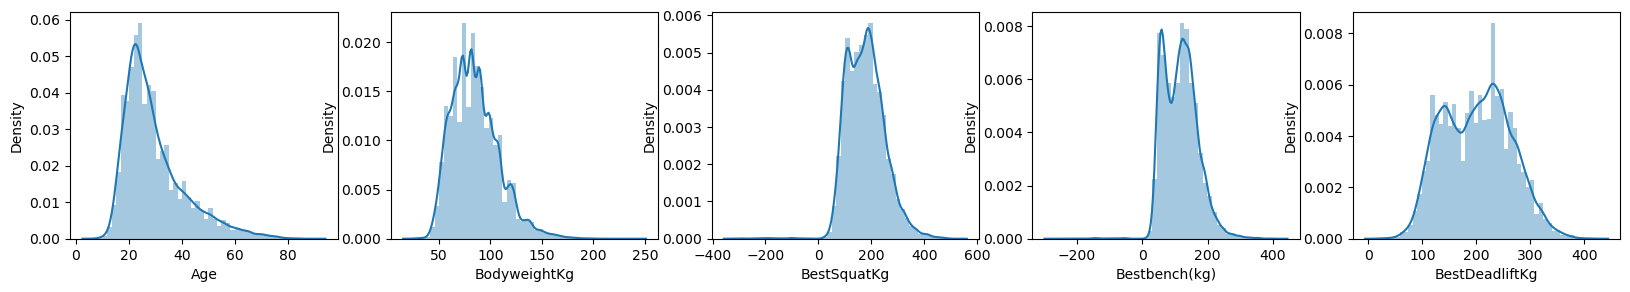

In [18]:
# outlier detection
plt.figure(figsize=(20,10))
plt.subplot(3,5,1)
sns.distplot(df1['Age'])
plt.subplot(3,5,2)
sns.distplot(df1['BodyweightKg'])
plt.subplot(3,5,3)
sns.distplot(df1['BestSquatKg'])
plt.subplot(3,5,4)
sns.distplot(df1['Bestbench(kg)'])
plt.subplot(3,5,5)
sns.distplot(df1['BestDeadliftKg'])
plt.show()


Calculating skewness value for selecting method to deal with outliers
- Close to 0- Normally distributed
- far from   0 - skewed data

In [19]:
# skew pecentage
print('Age:',df1['Age'].skew())
print('BodyweightKg:',df1['BodyweightKg'].skew())
print('BestSquatKg:',df1['BestSquatKg'].skew())
print('Bestbench(kg):',df1['Bestbench(kg)'].skew())
print('BestDeadliftKg:',df1['BestDeadliftKg'].skew())

Age: 1.3358755390599997
BodyweightKg: 0.7972128875272697
BestSquatKg: 0.2017740897029995
Bestbench(kg): 0.41035935703702553
BestDeadliftKg: 0.10126255058265984


Box plotting for outliers range

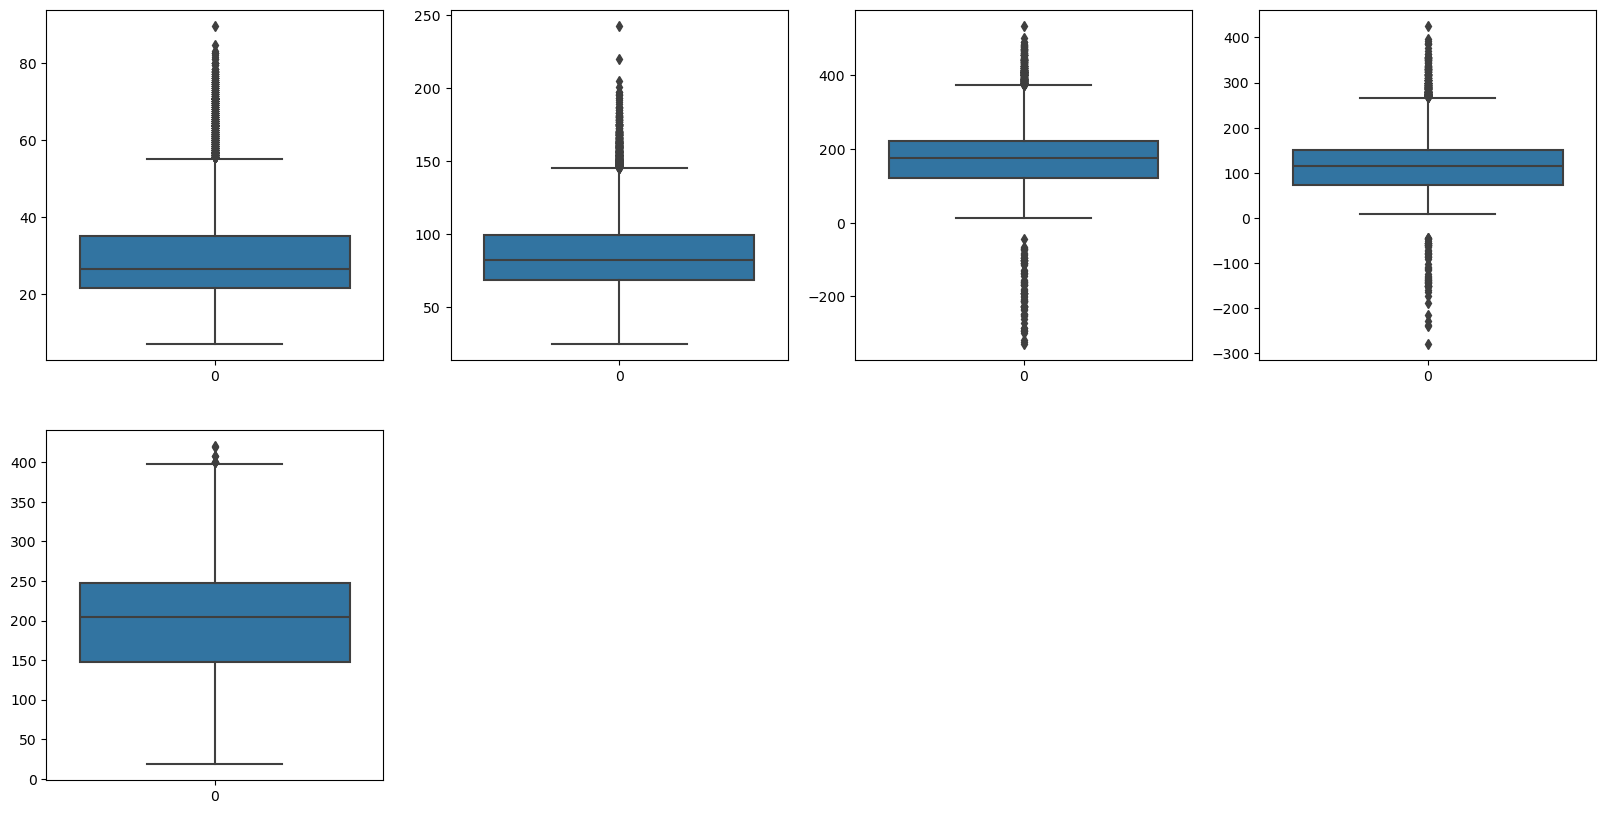

In [20]:
#box plot
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(df1['Age'])
plt.subplot(2,4,2)
sns.boxplot(df1['BodyweightKg'])
plt.subplot(2,4,3)
sns.boxplot(df1['BestSquatKg'])
plt.subplot(2,4,4)
sns.boxplot(df1['Bestbench(kg)'])
plt.subplot(2,4,5)
sns.boxplot(df1['BestDeadliftKg'])
plt.show()

### **Removal of outliers using iqr method column wise**

---



1. Age column

In [21]:
percentile_25 = df1['Age'].quantile(0.25)
percentile_75 = df1['Age'].quantile(0.75)

In [22]:
print('25th percentile:', percentile_25)
print('75th percentile:', percentile_75)

25th percentile: 21.5
75th percentile: 35.0


In [23]:
iqr = percentile_75 - percentile_25
print('IQR:', iqr)

IQR: 13.5


In [24]:
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

In [25]:
print('Upper Limit:', upper_limit)
print('Lower Limit:', lower_limit)

Upper Limit: 55.25
Lower Limit: 1.25


Finding Outliers


In [26]:
df1[ df1['Age'] >upper_limit].shape

(1274, 7)

In [27]:
df1[ df1['Age'] <lower_limit].shape

(0, 7)

In [28]:
#trimming the outliers
df1 = df1[ (df1['Age'] < upper_limit) & (df1['Age'] > lower_limit) ]


In [29]:
df1.shape

(28306, 7)

In [30]:
df1.head(1)

,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg,Bestbench(kg)
1,M,Raw,25.0,88.81,215.0,255.0,137.5


<Axes: >

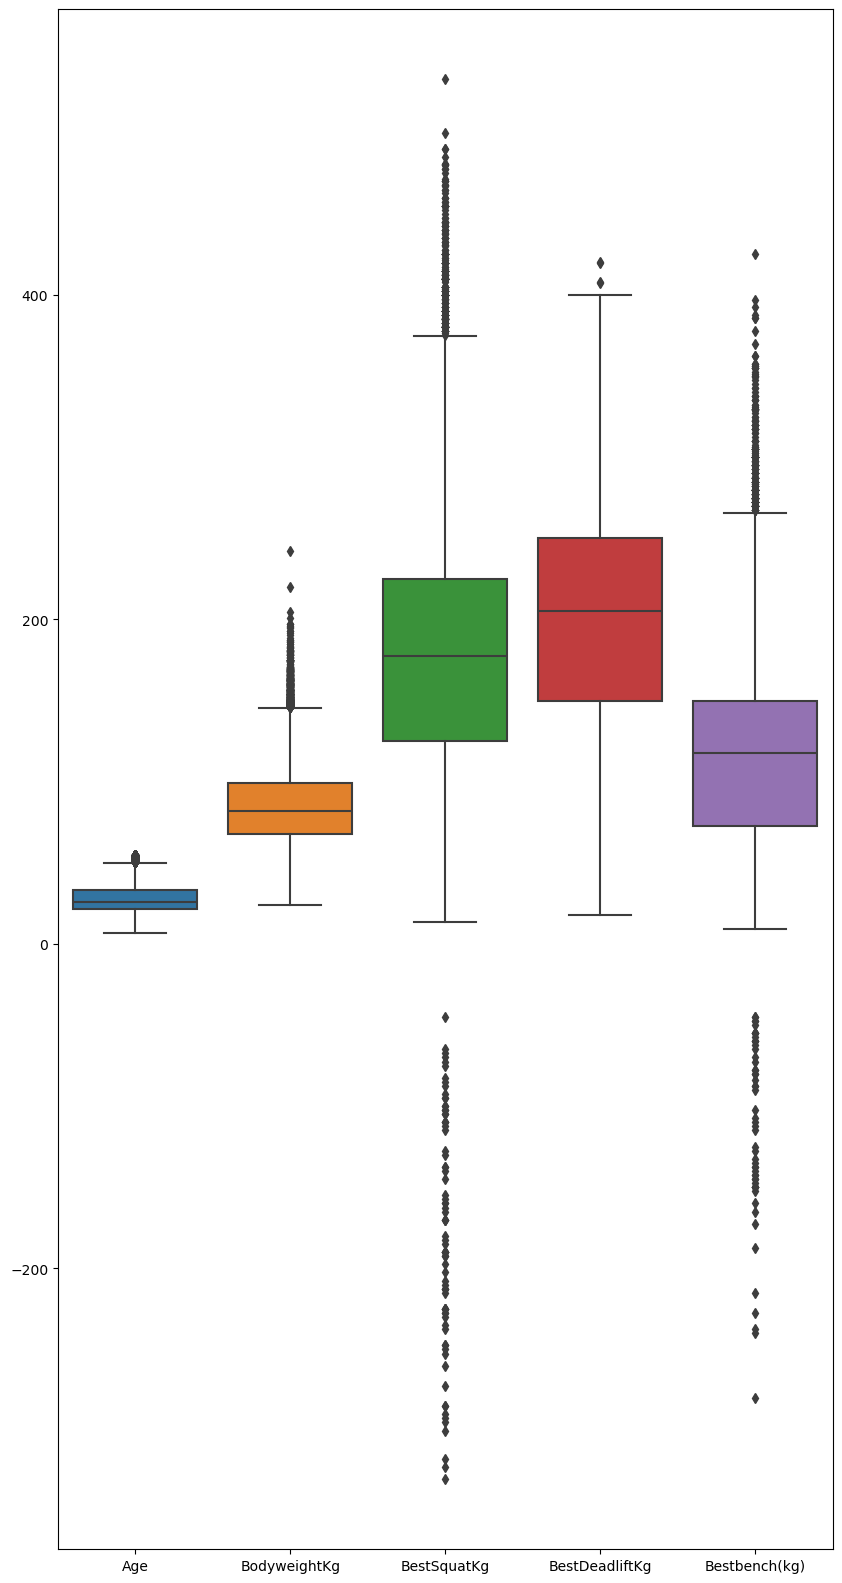

In [31]:
#all column box plot
plt.figure(figsize=(10,20))
sns.boxplot(data=df1)


 2. BodyweightKg

In [32]:
percentile_25 = df1['BodyweightKg'].quantile(0.25)
percentile_75 = df1['BodyweightKg'].quantile(0.75)

In [33]:
print('25th percentile:', percentile_25)
print('75th percentile:', percentile_75)


25th percentile: 67.8
75th percentile: 98.97


In [34]:
iqr = percentile_75 - percentile_25
print('IQR:', iqr)

IQR: 31.17


In [35]:
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

In [36]:
df1[ df1['BodyweightKg'] >upper_limit].shape

(474, 7)

In [37]:
df1[ df1['BodyweightKg'] <lower_limit].shape

(0, 7)

In [38]:
#trimming the outliers
df1 = df1[ (df1['BodyweightKg'] < upper_limit) ]

In [39]:
df1.shape

(27832, 7)

<Axes: >

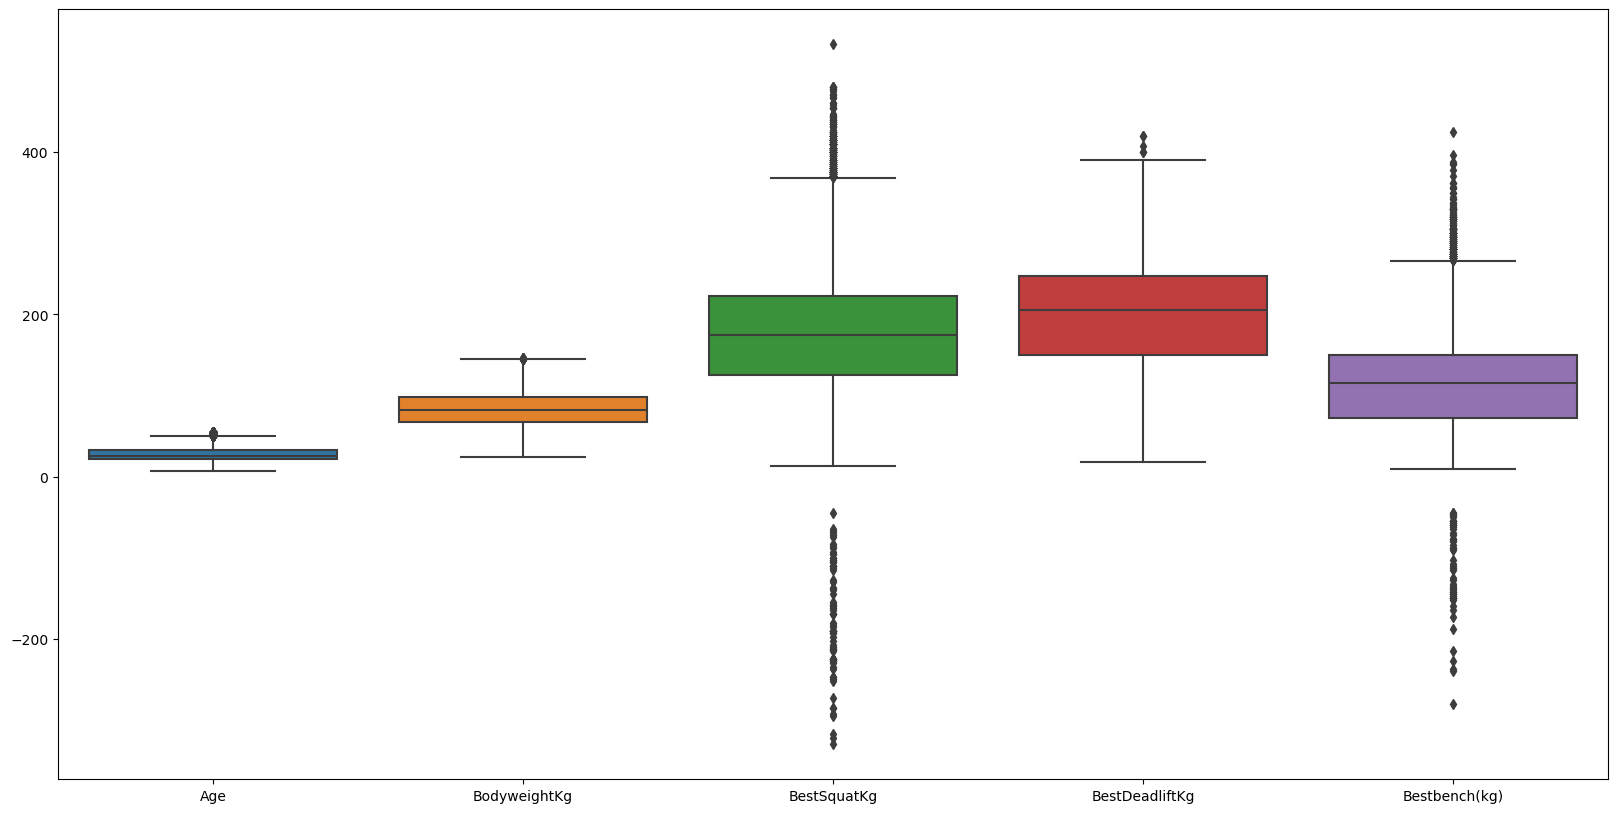

In [40]:
#box plot
plt.figure(figsize=(20,10))
sns.boxplot(df1)

3. BestSquatKg

In [41]:
percentile_25 = df1['BestSquatKg'].quantile(0.25)
percentile_75 = df1['BestSquatKg'].quantile(0.75)

In [42]:
print('25th percentile:', percentile_25)
print('75th percentile:', percentile_75)

25th percentile: 125.0
75th percentile: 222.5


In [43]:
iqr=percentile_75 - percentile_25
print('IQR:', iqr)

IQR: 97.5


In [44]:
upper_limit=percentile_75 + 1.5 * iqr
lower_limit=percentile_25 - 1.5 * iqr
print('Upper Limit:', upper_limit)
print('Lower Limit:', lower_limit)

Upper Limit: 368.75
Lower Limit: -21.25


In [45]:
#function for outliers


In [46]:
df1[ df1['BestSquatKg'] >upper_limit].shape

(238, 7)

In [47]:
df1[ df1['BestSquatKg'] <lower_limit].shape

(77, 7)

In [48]:
#trimming the outliers
df1 = df1[ (df1['BestSquatKg'] < upper_limit) & (df1['BestSquatKg'] > lower_limit) ]

In [49]:
df1.shape

(27517, 7)

In [50]:
df1['BestSquatKg'].describe()

count    27517.000000
mean       177.316476
std         64.532877
min         13.600000
25%        125.000000
50%        175.000000
75%        220.000000
max        367.500000
Name: BestSquatKg, dtype: float64

<Axes: >

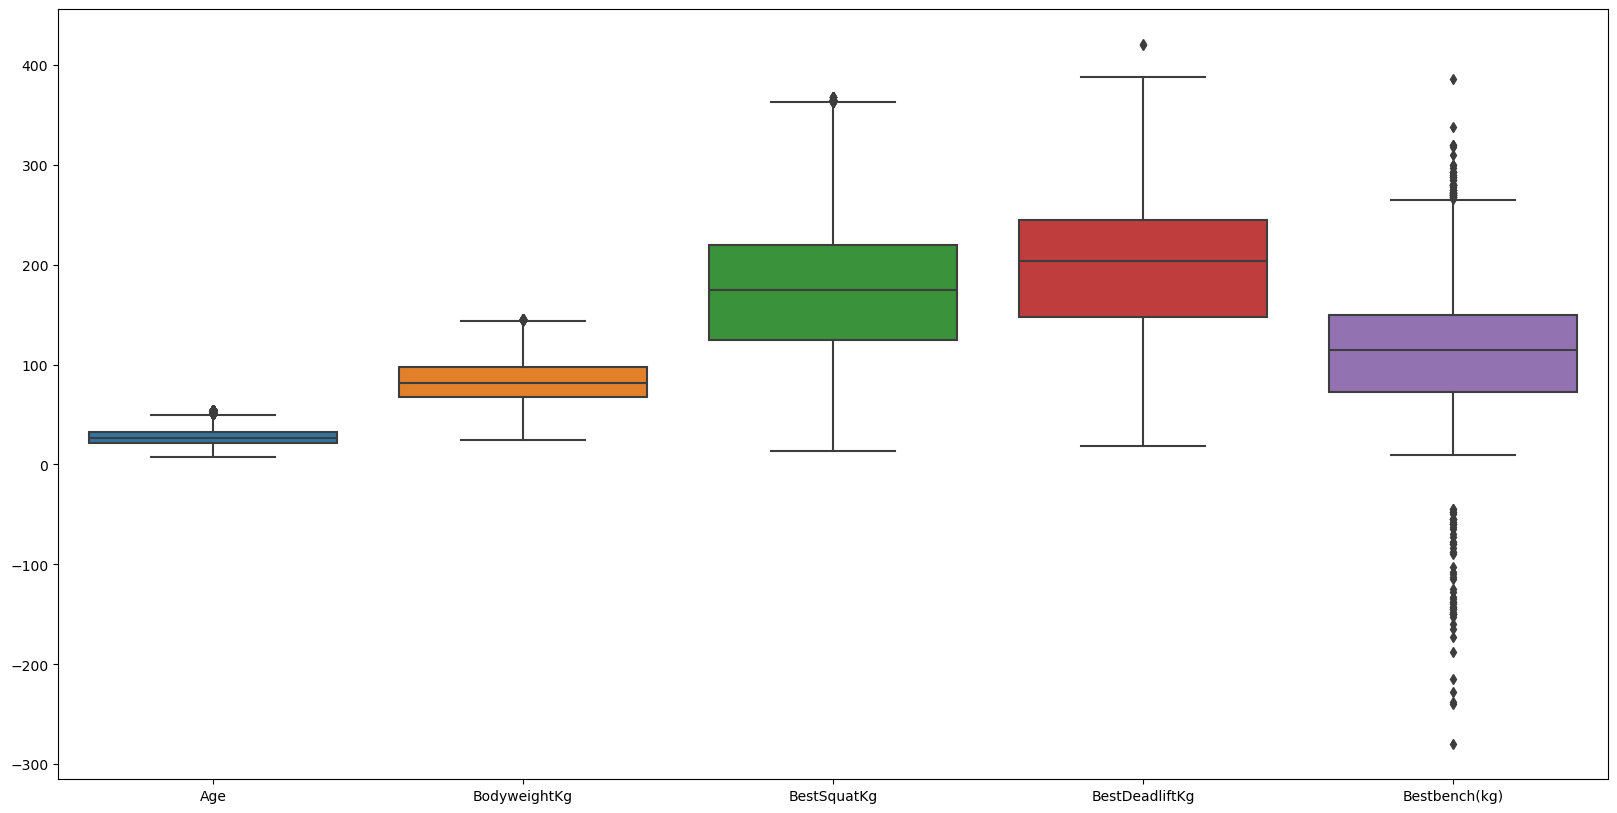

In [51]:
#boxplot
plt.figure(figsize=(20,10))
sns.boxplot(df1)


4. Bestbench(kg)

In [52]:
percentile_25 = df1['Bestbench(kg)'].quantile(0.25)
percentile_75 = df1['Bestbench(kg)'].quantile(0.75)
print('25th percentile:', percentile_25)
print('75th percentile:', percentile_75)

25th percentile: 72.5
75th percentile: 149.69


In [53]:
iqr = percentile_75 - percentile_25
print('IQR:', iqr)

IQR: 77.19


In [54]:
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
print('Upper Limit:', upper_limit)
print('Lower Limit:', lower_limit)

Upper Limit: 265.475
Lower Limit: -43.285


In [55]:
df1[ df1['Bestbench(kg)'] >upper_limit].shape

(52, 7)

In [56]:
df1[ df1['Bestbench(kg)'] <lower_limit].shape

(57, 7)

In [57]:
#trimming
df1 = df1[ (df1['Bestbench(kg)'] < upper_limit) & (df1['Bestbench(kg)'] > lower_limit) ]
df1.shape

(27408, 7)

In [58]:
df1['Bestbench(kg)'].describe()

count    27408.000000
mean       114.943516
std         47.774444
min          9.100000
25%         72.500000
50%        115.000000
75%        147.500000
max        265.000000
Name: Bestbench(kg), dtype: float64

<Axes: >

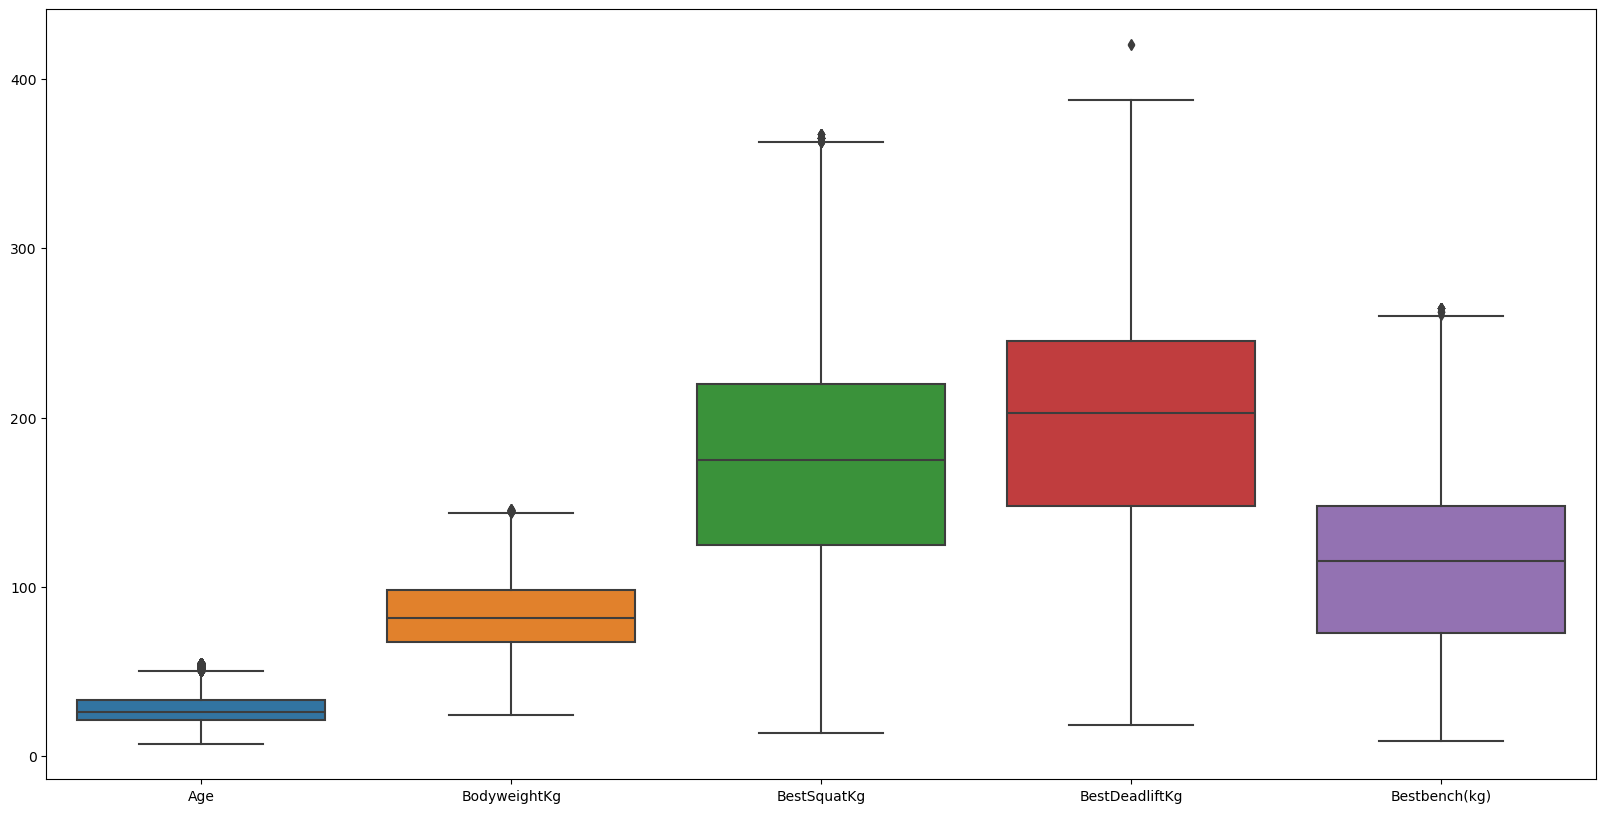

In [59]:
#boxplot
plt.figure(figsize=(20,10))
sns.boxplot(df1)


5. BestDeadliftKg

In [60]:
percentile_25 = df1['BestDeadliftKg'].quantile(0.25)
percentile_75 = df1['BestDeadliftKg'].quantile(0.75)
print('25th percentile:', percentile_25)
print('75th percentile:', percentile_75)

25th percentile: 147.5
75th percentile: 245.0


In [61]:
iqr=percentile_75-percentile_25
print('IQR:', iqr)

IQR: 97.5


In [62]:
upper_limit=percentile_75 + 1.5 * iqr
lower_limit=percentile_25 - 1.5 * iqr
print('Upper Limit:', upper_limit)
print('Lower Limit:', lower_limit)

Upper Limit: 391.25
Lower Limit: 1.25


In [63]:
df1[ df1['BestDeadliftKg'] >upper_limit].shape


(2, 7)

In [64]:
df1[ df1['BestDeadliftKg'] <lower_limit].shape

(0, 7)

In [65]:
#trimming
df1 = df1[ (df1['BestDeadliftKg'] < upper_limit) & (df1['BestDeadliftKg'] > lower_limit) ]
df1.shape

(27406, 7)

In [66]:
df1['BestDeadliftKg'].describe()

count    27406.000000
mean       200.129554
std         60.774771
min         18.100000
25%        147.500000
50%        202.500000
75%        245.000000
max        387.500000
Name: BestDeadliftKg, dtype: float64

<Axes: >

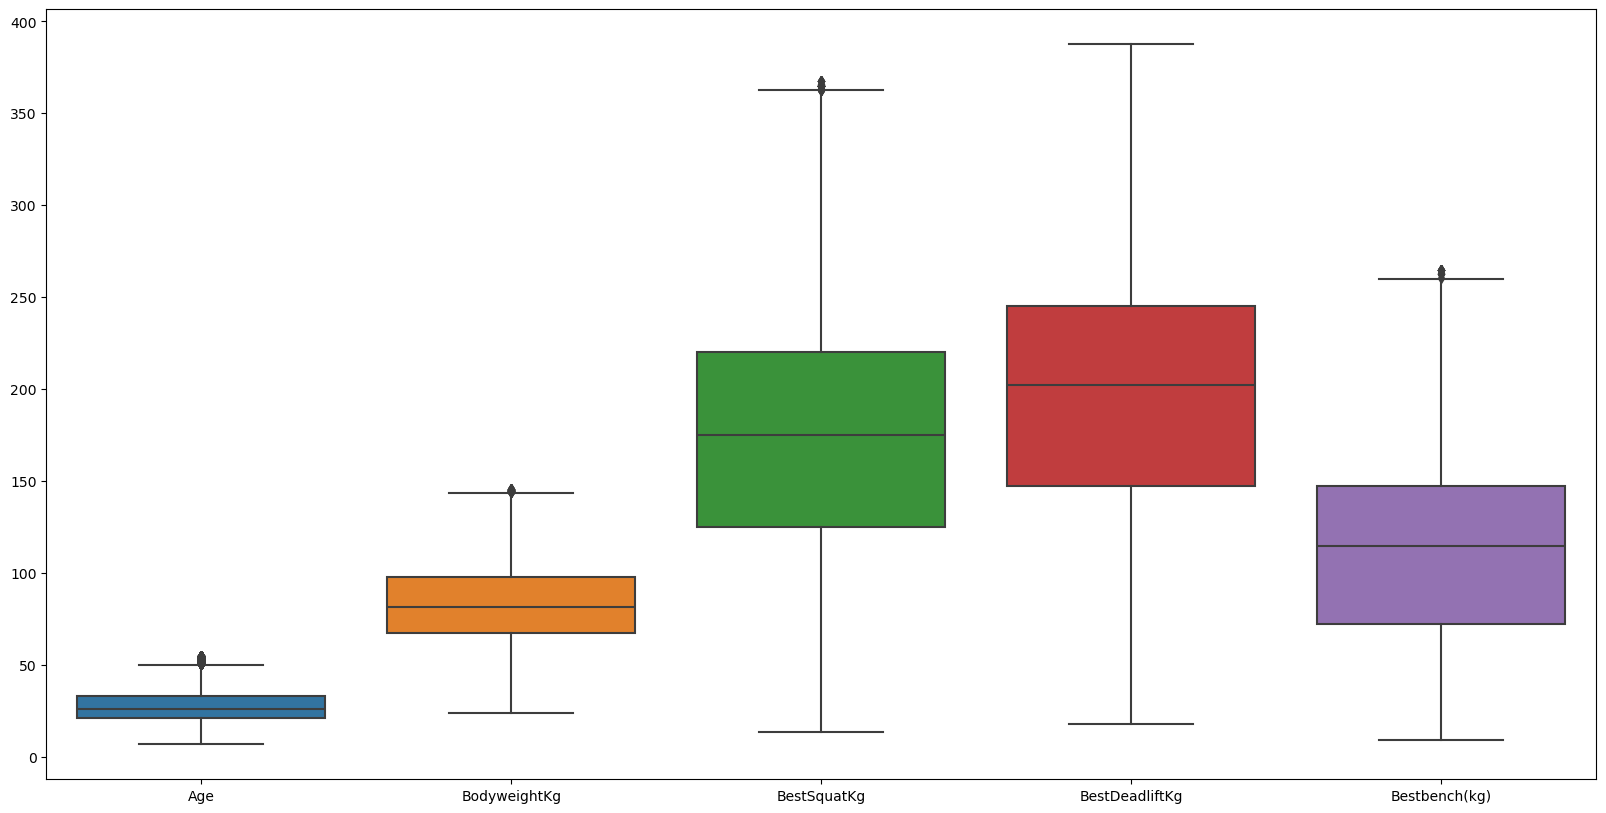

In [67]:
#boxplot
plt.figure(figsize=(20,10))
sns.boxplot(df1)

In [68]:
df1.describe()

,Age,BodyweightKg,BestSquatKg,BestDeadliftKg,Bestbench(kg)
count,27406.000000,27406.000000,27406.000000,27406.000000,27406.000000
mean,28.102605,83.786106,177.039435,200.129554,114.937492
std,9.291712,20.769594,64.213182,60.774771,47.770977
min,7.000000,24.100000,13.600000,18.100000,9.100000
25%,21.500000,67.400000,125.000000,147.500000,72.500000
50%,26.000000,81.700000,175.000000,202.500000,115.000000
75%,33.000000,98.000000,220.000000,245.000000,147.500000
max,55.000000,145.700000,367.500000,387.500000,265.000000


In [69]:
# #saving cleaned data
# df1.to_csv('gym_powerlifting_cleaned_data.csv',index=False)

## **Preprocessing**

Now Doing some preprocessing
1. encoding categorical data  by one hot encoder
2. scaling by using standardscaler

In [356]:
# # saving cleaned data
# df1.to_csv('gym_powerlifting_cleaned_data.csv', index=False)

In [71]:
X=df1.drop('BestDeadliftKg',axis=1)
y=df1['BestDeadliftKg']


In [72]:
X.head()

,Sex,Equipment,Age,BodyweightKg,BestSquatKg,Bestbench(kg)
1,M,Raw,25.0,88.81,215.0,137.5
2,M,Raw,20.5,117.95,207.5,110.0
3,M,Raw,21.0,73.98,192.5,115.0
4,F,Raw,17.5,46.00,62.5,42.5
5,F,Raw,28.0,48.00,92.5,47.5


In [73]:
y.head()

1    255.0
2    210.0
3    222.5
4    105.0
5    137.5
Name: BestDeadliftKg, dtype: float64

In [81]:

# Define the categorical and numerical feature lists
categorical_features = ['Sex', 'Equipment']
numerical_features = X.drop(categorical_features, axis=1).columns.tolist()

### Making Pipeline

In [82]:
# Define the preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [83]:
# Define the preprocessing steps for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

### Making Column Transformer

In [84]:
# Combine all preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])


In [85]:
# Fit the preprocessor
preprocessor.fit(X)

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Equipment']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'BodyweightKg', 'BestSquatKg',
                                  'Bestbench(kg)'])])

In [86]:
import pickle

In [87]:
# Save the fitted preprocessor
with open('preprocess_pipeline.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

In [88]:
# transform the data
X_transformed = preprocessor.transform(X)

In [349]:
X_transformed.head()

,Age,BodyweightKg,BestSquatKg,Bestbench(kg),Sex_F,Sex_M,Equipment_Multi-ply,Equipment_Raw,Equipment_Single-ply,Equipment_Wraps
0,-0.333917,0.241891,0.591175,0.472314,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.818229,1.644930,0.474375,-0.103359,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.764416,-0.472146,0.240774,0.001309,0.0,1.0,0.0,1.0,0.0,0.0
3,-1.141103,-1.819332,-1.783770,-1.516377,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.011043,-1.723036,-1.316567,-1.411709,1.0,0.0,0.0,1.0,0.0,0.0


## Train_test split

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X_transformed,y,test_size=0.2,random_state=40)

### Model to fit algorithm

In [91]:
# function to fit the model
def model_fit(model):
    model.fit(X_train,y_train)
    y_pred_test=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    print('Mean Squared Error Test :',mean_squared_error(y_test,y_pred_test))
    print('Mean Squared Error Train :',mean_squared_error(y_train,y_pred_train))
    print('R2 Score test:',r2_score(y_test,y_pred_test))
    print('R2 Score train:',r2_score(y_train,y_pred_train))
    print('Accuracy:',model.score(X_test,y_test))
    return model

## **Trying  different algorithm**

### **1. Random forest regressor**

In [92]:
#importing random forest regressor
from sklearn.ensemble import RandomForestRegressor
regressor_rfg = RandomForestRegressor(n_estimators=200,random_state=40)
model_fit(regressor_rfg)

Mean Squared Error Test : 469.67612508749335
Mean Squared Error Train : 59.08964174671318
R2 Score test: 0.8711403466560159
R2 Score train: 0.9840534929413091
Accuracy: 0.8711403466560159


RandomForestRegressor(n_estimators=200, random_state=40)

### **2. Linear Regression**

In [93]:
#importing linear regression
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
model_fit(regressor_lr)


Mean Squared Error Test : 483.5538923518696
Mean Squared Error Train : 431.7305039737907
R2 Score test: 0.8673328627679582
R2 Score train: 0.8834889952695776
Accuracy: 0.8673328627679582


LinearRegression()

### **3. Gradient Boosting regressor**

In [94]:
#importing gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
regressor_gbr = GradientBoostingRegressor(n_estimators=200,random_state=40)
model_fit(regressor_gbr)

Mean Squared Error Test : 448.2230538240483
Mean Squared Error Train : 365.5687199314034
R2 Score test: 0.8770261798472525
R2 Score train: 0.9013440596270494
Accuracy: 0.8770261798472525


GradientBoostingRegressor(n_estimators=200, random_state=40)

### **4. XGBoost Regressor**

In [89]:
# pip install xgboost

In [90]:
#importing XGBoost Regressor
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor(n_estimators=150,random_state=40)
model_fit(regressor_xgb)

Mean Squared Error Test : 465.8542221308624
Mean Squared Error Train : 218.56247176717517
R2 Score test: 0.8721889183499978
R2 Score train: 0.9410165995972708
Accuracy: 0.8721889183499978


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=40, ...)

### **5. Catboost regressor**

In [2]:
# pip install catboost

In [92]:
# importing Catboost regressor
from catboost import CatBoostRegressor
regressor_cat = CatBoostRegressor(n_estimators=150,random_state=40)
model_fit(regressor_cat)

Learning rate set to 0.311805
0:	learn: 45.9331517	total: 51.8ms	remaining: 7.72s
1:	learn: 35.9174999	total: 56.6ms	remaining: 4.19s
2:	learn: 29.5901823	total: 60.5ms	remaining: 2.96s
3:	learn: 25.6378738	total: 64.8ms	remaining: 2.36s
4:	learn: 23.4204830	total: 68.9ms	remaining: 2s
5:	learn: 22.0850757	total: 73.1ms	remaining: 1.75s
6:	learn: 21.3461104	total: 77.3ms	remaining: 1.58s
7:	learn: 20.8757966	total: 81.5ms	remaining: 1.45s
8:	learn: 20.5211606	total: 85.6ms	remaining: 1.34s
9:	learn: 20.3295907	total: 89.7ms	remaining: 1.25s
10:	learn: 20.2109288	total: 93.6ms	remaining: 1.18s
11:	learn: 20.1091637	total: 97.5ms	remaining: 1.12s
12:	learn: 20.0644618	total: 102ms	remaining: 1.07s
13:	learn: 20.0110576	total: 106ms	remaining: 1.03s
14:	learn: 19.9682229	total: 110ms	remaining: 986ms
15:	learn: 19.9336016	total: 114ms	remaining: 951ms
16:	learn: 19.8884215	total: 118ms	remaining: 923ms
17:	learn: 19.8374786	total: 123ms	remaining: 899ms
18:	learn: 19.8196553	total: 131ms	

### **6. AdaBoost**

In [93]:
#importing Adaboost regressor
from sklearn.ensemble import AdaBoostRegressor
regressor_ada = AdaBoostRegressor(n_estimators=150,random_state=40)
model_fit(regressor_ada)

Mean Squared Error Test : 944.5891027459929
Mean Squared Error Train : 910.0672059730103
R2 Score test: 0.7408439181155331
R2 Score train: 0.7544003873616475
Accuracy: 0.7408439181155331


AdaBoostRegressor(n_estimators=150, random_state=40)

### **7. LightGBM**

In [94]:
# pip install lightgbm

In [95]:
#importing lightgbm regressor
from lightgbm import LGBMRegressor
regressor_lgbm = LGBMRegressor(n_estimators=200,learning_rate=0.1,random_state=40)
model_fit(regressor_lgbm)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 21924, number of used features: 10
[LightGBM] [Info] Start training from score 200.265285
Mean Squared Error Test : 444.3157864898929
Mean Squared Error Train : 311.6834840824603
R2 Score test: 0.8780981719867459
R2 Score train: 0.9158860549484578
Accuracy: 0.8780981719867459


LGBMRegressor(n_estimators=200, random_state=40)

### **8. K-Nearest Neighbour regressor**

In [95]:
#importing Knn regressor
from sklearn.neighbors import KNeighborsRegressor
regressor_knn = KNeighborsRegressor(n_neighbors=10)
model_fit(regressor_knn)

Mean Squared Error Test : 475.86511849233864
Mean Squared Error Train : 348.3829973482485
R2 Score test: 0.8694423434957574
R2 Score train: 0.9059819663460595
Accuracy: 0.8694423434957574


KNeighborsRegressor(n_neighbors=10)

- Lightgbm regressor because train R2score=0.91 and test r2 score =0.87 so 0.91-0.87=0.04 error which is quite good for model this means model fitting to train and test is quite good and with better genralisation and minimal overfitting.

- Gradient Boosting regression train r2score=0.90and test r2 score= 0.87
so 0.90-0.87 = 0.03 error which is also quite good for model this means model fitting to train and test is quite good and with better genralisation and minimal overfitting.

we are choosing **Gradient boosting regressor** because it is having minimal overfitting

### **Cross-Validation**

In [98]:
# k-fold cross-validation
def k_fold_cross_validation(model):
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X =X_transformed, y = y, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    return accuracies

In [99]:
#cross validation for gradient boosting regressor
k_fold_cross_validation(regressor_gbr)

Accuracy: 88.97 %
Standard Deviation: 0.51 %


array([0.8964692 , 0.89189174, 0.88748754, 0.89610166, 0.89176414,
       0.88535328, 0.87999221, 0.89414694, 0.88887868, 0.88498366])

## **Saving model and pipeline**

In [100]:
import pickle

In [101]:
pickle.dump(regressor_gbr,open('model.pkl','wb'))
